In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

from pathlib import Path
import random

In [2]:
df_door = pd.read_csv('../data/baselines_door.csv')
df_sd   = pd.read_csv('../data/baselines_sliding_door.csv')
df_door_lstm = pd.read_csv('../data/baselines_door_bc.csv')
df_sd_lstm   = pd.read_csv('../data/baselines_sliding_door_bc.csv')

frames = [('Door', pd.concat([df_door, df_door_lstm])), ('Hatch', pd.concat([df_sd, df_sd_lstm]))]

In [3]:
COLORS = np.array([['#12DB00', '#70F20C', '#B8E80C', '#0CF23E', '#0CE879'],
                   ['#DB6300', '#F2520C', '#E82F0C', '#F2940C', '#E8A40C'],
                   ['#42CEF5', '#31DED5', '#37FAB9', '#318BDE', '#3769FA'],
                   ['#F4D221', '#DEA814', '#FAA717', '#DED114', '#DFFA17'],
                   ['#F51D4F', '#DE10A7', '#DD12FA', '#DE2010', '#FA4612'],
                   ['#7C15F5', '#3209DE', '#0A1CFA', '#A609DE', '#FA0AF5'],
                   ['#1B3EF5', '#0D67DE', '#0FB2FA', '#220DDE', '#670FFA']])

COLORS_RANDOM = COLORS.flatten().copy() 
random.shuffle(COLORS.flatten())

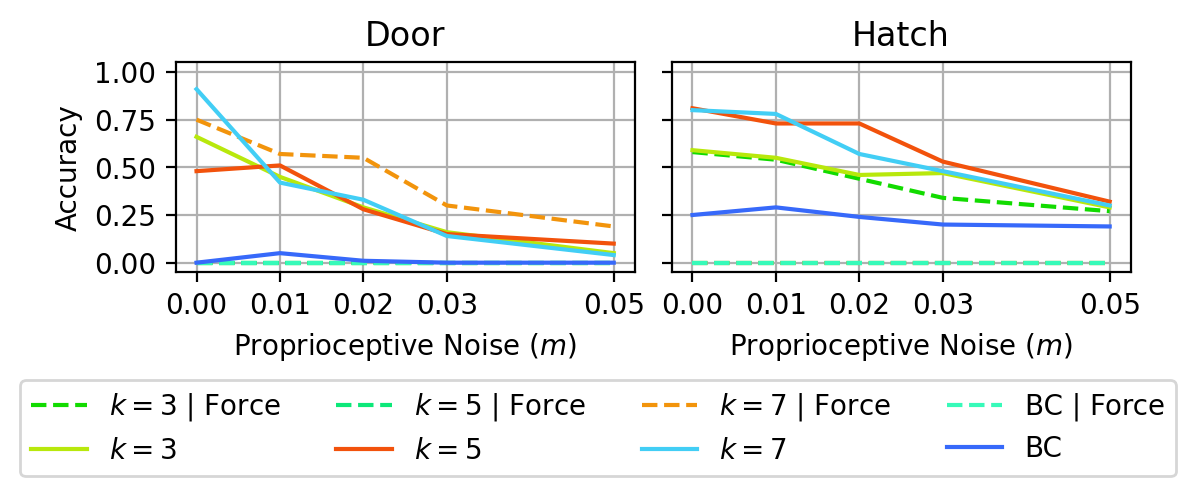

In [4]:


fig, axes = plt.subplots(1, 2, figsize=(14 / 2.54, 6 / 2.54), layout='constrained', dpi=200)

legend = {}

for x, ((title, df), ax) in enumerate(zip(frames, axes)):
    if x == 0:
        ax.set_yticks(np.linspace(0.0, 1.0, 5))
        ax.set_ylabel('Accuracy')
    else:
        ax.set_yticks(np.linspace(0.0, 1.0, 5), [])

    ax.set_xlabel('Proprioceptive Noise $(m)$')
    ax.set_xticks(df.noise.unique())
    ax.set_title(f'{title}')

    models = df.model.unique()

    data = {m: df[df.model == m][['noise', 'accuracy']] for m in models}


    for y, (m, sdf) in enumerate(data.items()):
        name = Path(m).name
        parts = name[:-4].split('_')
        if len(parts) == 3:
            if parts[2] in {'js', 'ft', 't'}:
                continue
            if parts[2] != 'geom':
                additional_dim = {'f': 'Force', 't': 'Torque', 'js': 'Joint State', 'ft': 'Wrench'}[parts[2]]
            else:
                additional_dim = None
        else:
            additional_dim = None
        
        if parts[1] == 'lstm':
            label = f'BC' if additional_dim is None else f'BC | {additional_dim}'
        else:
            n_priors = int(parts[1][:-1])
            label = f'$k={n_priors}$' if additional_dim is None else f'$k={n_priors}$ | {additional_dim}'

        # if Path(m).name[-5] == 'p':

        ax.plot(sdf.noise, sdf.accuracy, c=COLORS_RANDOM[y], label=label, ls=('--' if additional_dim is not None else '-'))

    ax.grid(True)
    # if x == 0:
    #     ax.legend(bbox_to_anchor=(0., -.92, 2.2, .102),  loc='lower left',
    #                   ncols=3, mode="expand", borderaxespad=0)
    ax.set_ylim((0 - 0.05, 1.0 + 0.05))
    handles, labels = ax.get_legend_handles_labels()
    legend.update(dict(zip(labels, handles)))

fig.legend(legend.values(), legend.keys(), loc='outside lower center', ncols=4)
# fig.tight_layout()

fig.savefig('gmm_baseline_plot.png')